# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
from config import api_key

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

In [4]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : cayenne
Processing Record 2 of Set 1 : zhigansk
Processing Record 3 of Set 1 : wilmington
Processing Record 4 of Set 1 : teixoso
Processing Record 5 of Set 1 : port alfred
Processing Record 6 of Set 1 : arraial do cabo
Processing Record 7 of Set 1 : punta arenas
Processing Record 8 of Set 1 : bubaque
Processing Record 9 of Set 1 : chokurdakh
Processing Record 10 of Set 1 : yellowknife
Processing Record 11 of Set 1 : rikitea
Processing Record 12 of Set 1 : christchurch
City not found. Skipping...
Processing Record 13 of Set 1 : ushuaia
Processing Record 14 of Set 1 : bambous virieux
Processing Record 15 of Set 1 : ciudad bolivar
Processing Record 16 of Set 1 : epe
Processing Record 17 of Set 1 : east london
Processing Record 18 of Set 1 : new norfolk
Processing Record 19 of Set 1 : rawson
Processing Record 20 of Set 1 : lebu
Processing Record 21 of Set 1 : vaini
Processing Record 22 of Set 1 : jamesto

Processing Record 33 of Set 4 : bethlehem
Processing Record 34 of Set 4 : houston
City not found. Skipping...
Processing Record 35 of Set 4 : margate
Processing Record 36 of Set 4 : grand gaube
Processing Record 37 of Set 4 : sahuaripa
Processing Record 38 of Set 4 : bathsheba
City not found. Skipping...
Processing Record 39 of Set 4 : fare
Processing Record 40 of Set 4 : avarua
Processing Record 41 of Set 4 : manadhoo
Processing Record 42 of Set 4 : waipawa
Processing Record 43 of Set 4 : mehamn
Processing Record 44 of Set 4 : yantal
Processing Record 45 of Set 4 : norman wells
City not found. Skipping...
Processing Record 46 of Set 4 : tuatapere
Processing Record 47 of Set 4 : narasannapeta
Processing Record 48 of Set 4 : marsh harbour
Processing Record 49 of Set 4 : tasiilaq
Processing Record 50 of Set 4 : nicosia
Processing Record 0 of Set 5 : leningradskiy
Processing Record 1 of Set 5 : dikson
Processing Record 2 of Set 5 : haines junction
Processing Record 3 of Set 5 : shimoda
Pr

Processing Record 18 of Set 8 : derzhavinsk
Processing Record 19 of Set 8 : isangel
Processing Record 20 of Set 8 : lixourion
City not found. Skipping...
Processing Record 21 of Set 8 : aklavik
Processing Record 22 of Set 8 : lompoc
Processing Record 23 of Set 8 : jacareacanga
Processing Record 24 of Set 8 : kipini
Processing Record 25 of Set 8 : tezu
Processing Record 26 of Set 8 : luanda
Processing Record 27 of Set 8 : yerbogachen
Processing Record 28 of Set 8 : namalenga
Processing Record 29 of Set 8 : vila
City not found. Skipping...
Processing Record 30 of Set 8 : stange
Processing Record 31 of Set 8 : cambados
Processing Record 32 of Set 8 : ranau
Processing Record 33 of Set 8 : camacha
Processing Record 34 of Set 8 : sao miguel do araguaia
Processing Record 35 of Set 8 : havelock
Processing Record 36 of Set 8 : orbetello
Processing Record 37 of Set 8 : kilimatinde
Processing Record 38 of Set 8 : nove mesto na morave
Processing Record 39 of Set 8 : darhan
Processing Record 40 of 

Processing Record 50 of Set 11 : pak phanang
City not found. Skipping...
Processing Record 0 of Set 12 : auki
Processing Record 1 of Set 12 : queanbeyan
Processing Record 2 of Set 12 : abu kamal
Processing Record 3 of Set 12 : korla
Processing Record 4 of Set 12 : alta floresta
Processing Record 5 of Set 12 : barzas
Processing Record 6 of Set 12 : hasaki
Processing Record 7 of Set 12 : margherita
City not found. Skipping...
Processing Record 8 of Set 12 : pasni
City not found. Skipping...
Processing Record 9 of Set 12 : homer
Processing Record 10 of Set 12 : phalodi
Processing Record 11 of Set 12 : candoso
Processing Record 12 of Set 12 : semey
Processing Record 13 of Set 12 : nara
Processing Record 14 of Set 12 : san matias
Processing Record 15 of Set 12 : bertoua
Processing Record 16 of Set 12 : charters towers
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# Create a panda data frame using data retrieved
weather_df = pd.DataFrame({ 
                "City" : city_name_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness": cloudiness_list,
                "Wind Speed": wind_speed_list,
                "Country": country_list,
                "Date": date_list,       
                   
                })


In [17]:
# Count data
weather_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [20]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cayenne,4.9333,-52.3333,75.20,100,90,3.44,GF,1615576323
1,Zhigansk,66.7697,123.3711,-2.83,98,100,7.34,RU,1615576399
2,Wilmington,34.2257,-77.9447,78.80,38,1,11.50,US,1615576306
3,Teixoso,40.3145,-7.4576,48.99,60,0,4.63,PT,1615576399
4,Port Alfred,-33.5906,26.8910,75.04,87,1,20.87,ZA,1615576401


In [18]:
# Display the Data Frame
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,19.492563,16.325197,56.016360,70.157712,48.544194,8.785546,1.615577e+09
std,33.308693,90.720966,27.395394,21.366943,40.466360,6.080340,1.204662e+02
min,-54.800000,-175.200000,-27.400000,4.000000,0.000000,0.510000,1.615576e+09
25%,-8.419200,-63.598600,39.200000,58.000000,1.000000,3.940000,1.615576e+09
50%,25.208800,19.567500,64.650000,75.000000,40.000000,7.830000,1.615577e+09
75%,46.485600,97.200000,78.010000,87.000000,90.000000,12.150000,1.615577e+09
max,78.218600,178.416700,97.270000,100.000000,100.000000,34.520000,1.615577e+09


In [21]:
# Save city data into a csv file
weather_df.to_csv("output_data/cities.csv", index = False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

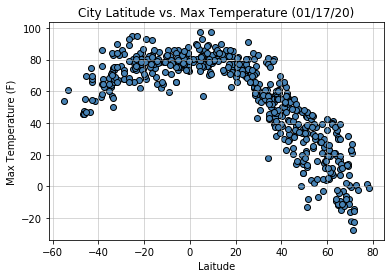

In [36]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Max Temperature.png")


#### Latitude vs. Humidity Plot

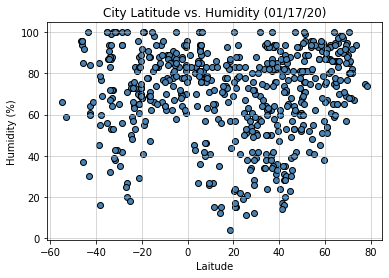

In [37]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Humidity.png")

#### Latitude vs. Cloudiness Plot

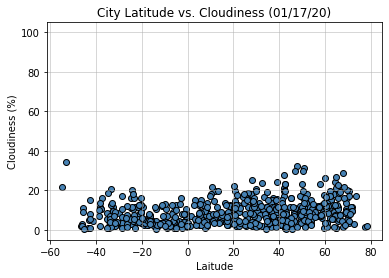

In [38]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Cloudiness.png")

#### Latitude vs. Wind Speed Plot

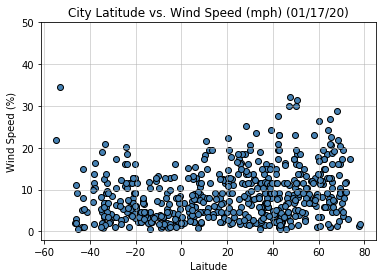

In [39]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [40]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_df["Lat"] < 0]

In [41]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.89


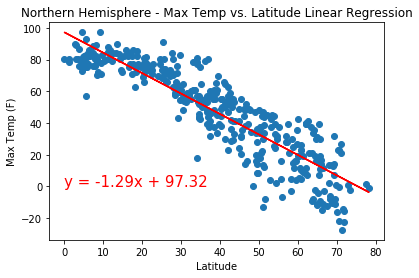

In [42]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.54


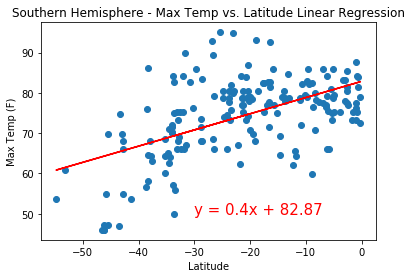

In [43]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.23


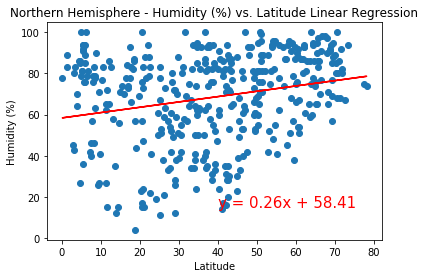

In [44]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.17


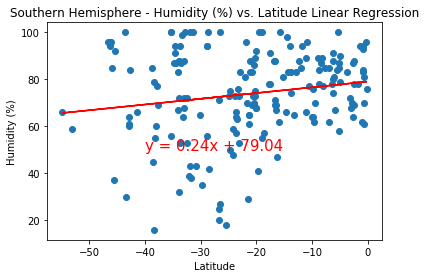

In [45]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.17


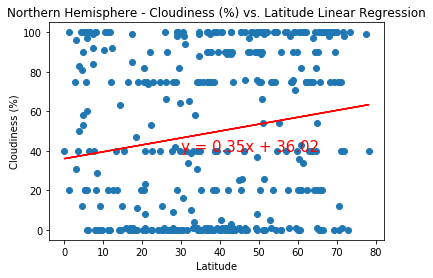

In [46]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.35


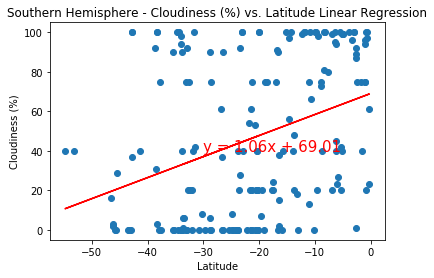

In [47]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.15


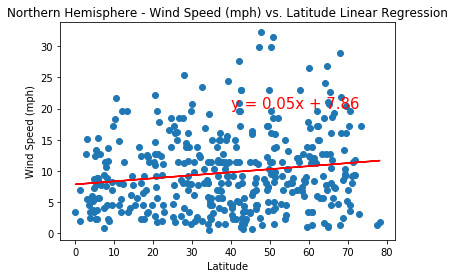

In [48]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.23


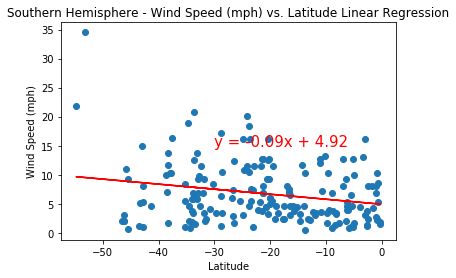

In [49]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")